In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

In [23]:
data = pd.read_csv('train.csv')

In [3]:
data.head(2)

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,1,0.575560,0.425868,0.531401,0.439899,green,Goblin


### Initial attempt

In [17]:
data['color'].unique()

array(['clear', 'green', 'black', 'white', 'blue', 'blood'], dtype=object)

In [20]:
colors = {}
i = 0
for color in data['color'].unique():
    colors[color] = i
    i += 1
    
colors

{'black': 2, 'blood': 5, 'blue': 4, 'clear': 0, 'green': 1, 'white': 3}

In [25]:
for key, value in colors.items():
    data.loc[data['color'] == key, 'color_id'] = value

In [27]:
data.head(2)

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type,color_id
0,0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul,0.0
1,1,0.575560,0.425868,0.531401,0.439899,green,Goblin,1.0


In [58]:
X_train = data[['bone_length', 'rotting_flesh', 'hair_length', 'has_soul', 'color_id']]
Y_train = data['type']

In [29]:
clf = RandomForestClassifier(n_estimators=100)

In [35]:
clf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [30]:
test_data = pd.read_csv('test.csv')
test_data.head(2)

,id,bone_length,rotting_flesh,hair_length,has_soul,color
0,3,0.471774,0.387937,0.706087,0.698537,black
1,6,0.427332,0.645024,0.565558,0.451462,white


In [60]:
for key, value in colors.items():
    test_data.loc[test_data['color'] == key, 'color_id'] = value
    
X_test = test_data[['bone_length', 'rotting_flesh', 'hair_length', 'has_soul', 'color_id']]

In [36]:
pred = clf.predict(X_test)

In [40]:
np.savetxt('submssion_rf.csv', np.c_[test_data['id'],pred], delimiter=',', 
           header = 'id,type', comments = '', fmt='%s')

Accuracy on Kaggle: .71267

Using other algorithms to classify

In [50]:
X_train = data[['bone_length', 'rotting_flesh', 'hair_length', 'has_soul']]
clf.fit(X_train, Y_train)
X_test = test_data[['bone_length', 'rotting_flesh', 'hair_length', 'has_soul']]
pred = clf.predict(X_test)
np.savetxt('submssion_rf_no_color.csv', np.c_[test_data['id'],pred], delimiter=',', 
           header = 'id,type', comments = '', fmt='%s')

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Accuracy on Kaggle:  0.70888 

In [65]:
neighbor = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
neighbor.fit(X_train, Y_train)
pred = neighbor.predict(X_test)
np.savetxt('submssion_KNN.csv', np.c_[test_data['id'],pred], delimiter=',', 
           header = 'id,type', comments = '', fmt='%s')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

Accuracy on Kagge: .67108

### Analysis

In [47]:
corr_df = data.copy()
for key, value in colors.items():
    corr_df.loc[data['color'] == key, 'color_id'] = value

data.loc[data['type'] == 'Ghoul', 'type_id'] = 1
data.loc[data['type'] == 'Goblin', 'type_id'] = 2
data.loc[data['type'] == 'Ghost', 'type_id'] = 3

corr_df = data[['bone_length', 'rotting_flesh', 'hair_length', 'has_soul', 'color_id', 'type_id']]

In [48]:
corr_df.corr()

,bone_length,rotting_flesh,hair_length,has_soul,color_id,type_id
bone_length,1.000000,-0.041716,0.353881,0.381675,0.018126,-0.520687
rotting_flesh,-0.041716,1.000000,-0.220353,-0.132051,0.118533,0.278228
hair_length,0.353881,-0.220353,1.000000,0.474835,-0.123635,-0.674640
has_soul,0.381675,-0.132051,0.474835,1.000000,-0.007005,-0.649989
color_id,0.018126,0.118533,-0.123635,-0.007005,1.000000,0.034793
type_id,-0.520687,0.278228,-0.674640,-0.649989,0.034793,1.000000


Hair color does not really help much in the classifcation task.

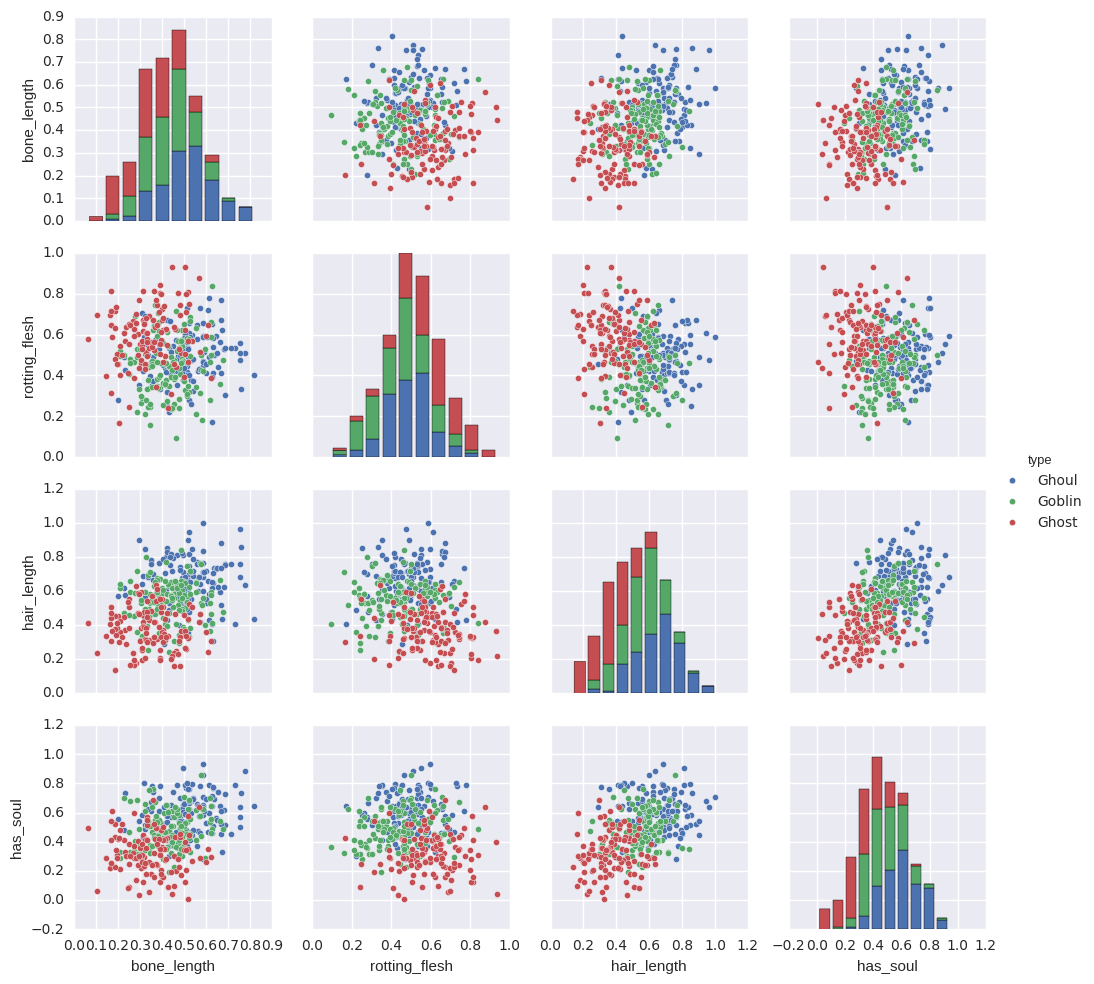

In [108]:
sns.set()
sns.pairplot(data[['bone_length', 'rotting_flesh', 'hair_length', 'has_soul', 'type']], hue="type")

Derived Features- introducing non linear relationships

In [122]:
data['hair_soul'] = data.apply(lambda r: r['hair_length'] * r['has_soul'], axis=1)
data['hair_bone'] = data.apply(lambda r: r['hair_length'] * r['bone_length'], axis=1)
data['bone_soul'] = data.apply(lambda r: r['has_soul'] * r['bone_length'], axis=1)
data['hair_bone_soul'] = data.apply(lambda r: r['hair_length'] * r['has_soul'] * r['bone_length'], axis=1)

test_data['hair_soul'] = test_data.apply(lambda r: r['hair_length'] * r['has_soul'], axis=1)
test_data['hair_bone'] = test_data.apply(lambda r: r['hair_length'] * r['bone_length'], axis=1)
test_data['bone_soul'] = test_data.apply(lambda r: r['has_soul'] * r['bone_length'], axis=1)
test_data['hair_bone_soul'] = test_data.apply(lambda r: r['hair_length'] * r['has_soul'] * r['bone_length'], axis=1)

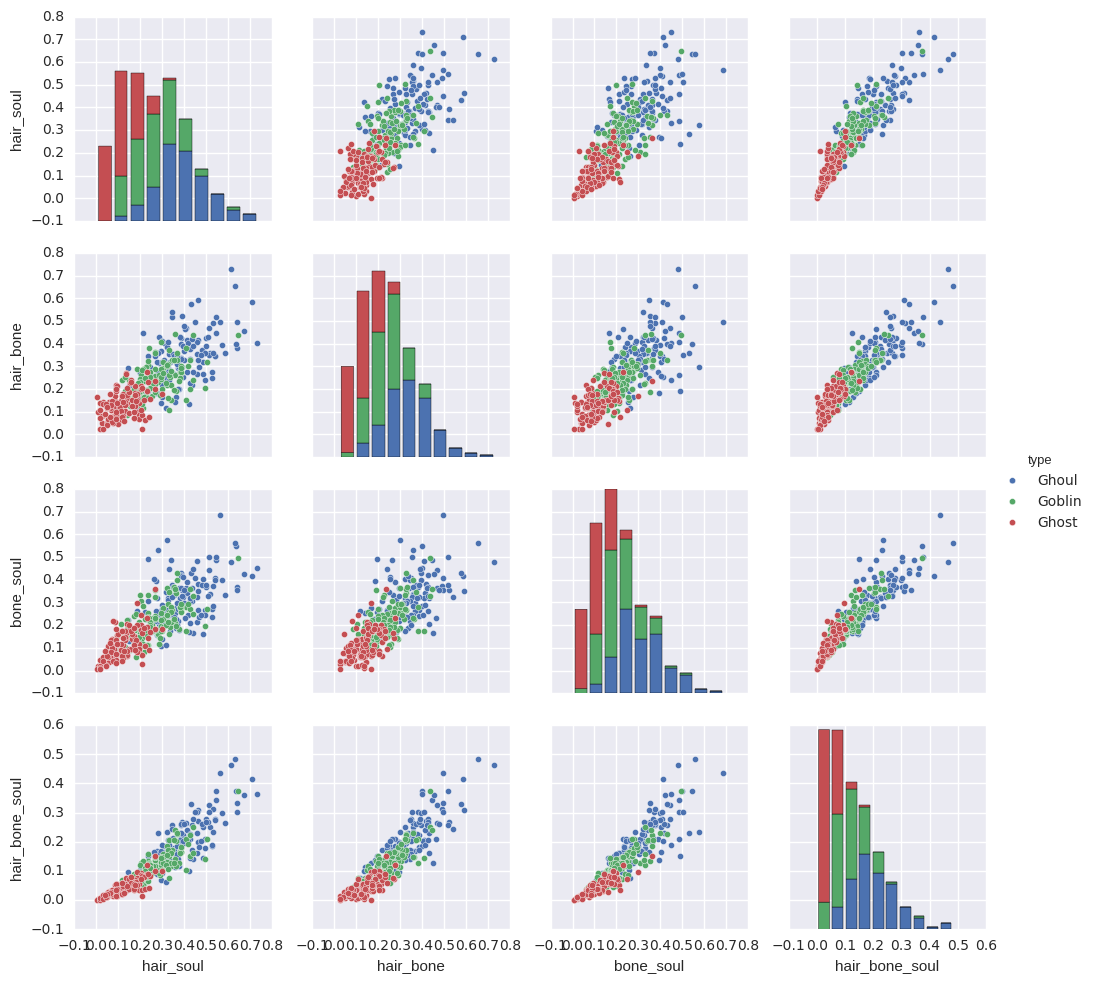

In [118]:
sns.set()
sns.pairplot(data[['hair_soul', 'hair_bone', 'bone_soul', 'hair_bone_soul', 'type']], hue='type')

We can see tha these derived features seem much better for the classification task.

In [123]:
X_train = data[['bone_length', 'rotting_flesh', 'hair_length', 'has_soul', 'hair_soul', 'hair_bone', 'bone_soul', 'hair_bone_soul']]
X_test = test_data[['bone_length', 'rotting_flesh', 'hair_length', 'has_soul', 'hair_soul', 'hair_bone', 'bone_soul', 'hair_bone_soul']]

In [121]:
lin_clf = svm.LinearSVC()
lin_clf.fit(X_train, Y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [124]:
pred = lin_clf.predict(X_test)
np.savetxt('submssion_svm.csv', np.c_[test_data['id'],pred], delimiter=',', 
           header = 'id,type', comments = '', fmt='%s')

Accuracy on Kaggle: 0.73346 